# Question 2 Analysis 2

Problem: Find out the most interesting news NYT articles

In [1]:
import os
import json
import nltk
import requests
import matplotlib.pyplot as plt
import operator 

Setting up Path Variables

In [2]:
rpath="C:/Users/Ankit Mahajan/Documents/Python Scripts/mahajan_ankit/"
path="midterm/data/"
root = rpath+path

Loading the Json data from the file

In [3]:
with open(root+"ArticleSearch.json",'r') as f:
    json_object = json.load(f)

Logic for analysis

In [4]:
i=0

#Creating a dictionary to save data
datatoanalyse = {}                                

#tokenizer to separate words without punctuation
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

#iterating through the objects
while i < len(json_object[0]['results']):         
    #collecting words without spces and punctuation from title and abstract of the article
    for k in nltk.pos_tag(tokenizer.tokenize((json_object[0]['results'][i]['abstract']
                                              +json_object[0]['results'][i]['title']).lower())):
        #escaping stopwords
        if k[0] in nltk.corpus.stopwords.words():
            continue
        #Counting only nouns and verbs and storing them in a dictionary
        elif k[1] in ['NN','NNP','NNPS','NNS','VB','VBD','VBG','VBN','VBP','VBZ']:
            if k[0] in datatoanalyse:
                datatoanalyse[k[0]] +=1
            else:
                datatoanalyse[k[0]] = 1        
    i+=1

Sorting and preparing results fro visualization

In [5]:
freq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)[:15]
freq.reverse()

Graphical representation of the result

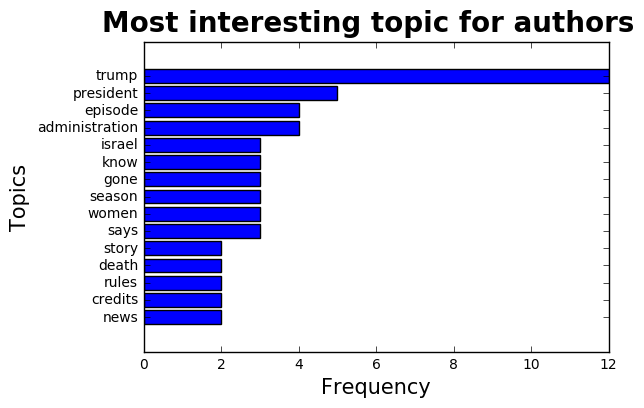

In [6]:
labels, values = zip(*freq)
plt.barh(range(len(freq)), values, align='center')
plt.yticks(range(len(freq)), labels)
fig = plt.gcf()
plt.suptitle("Most interesting topic for authors" , fontsize=20, fontweight="bold")
plt.ylabel("Topics", fontsize=15)
plt.xlabel("Frequency", fontsize=15)
plt.show()